In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [2]:
stock_data = pd.read_csv('2018_US_Stock_Data.csv')
stock_data.shape

(4291, 171)

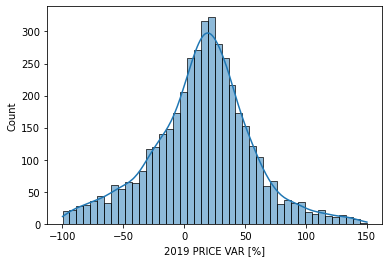

In [3]:
sns.histplot(data=stock_data, x="2019 PRICE VAR [%]", kde=True);


## Target variable is normaly distributed

In [4]:
unwanted_cols = []
# Finding the coloumns where variance is zero
for val in stock_data.var().iteritems():
    if val[1]==0:
        unwanted_cols.append(val[0])
print("Cols with variance zero" ,unwanted_cols)
## 'Unnamed: 0' and '2019 PRICE VAR [%]' are unwanted coloumns 
unwanted_cols.extend(['Unnamed: 0','2019 PRICE VAR [%]'])
stock_data.drop(columns =unwanted_cols, inplace=True, axis=1)
print("Total Removed columns: ", unwanted_cols)

Cols with variance zero ['operatingProfitMargin']
Total Removed columns:  ['operatingProfitMargin', 'Unnamed: 0', '2019 PRICE VAR [%]']


In [5]:
for col in stock_data.columns:
    if stock_data[col].isnull().sum():
        if stock_data[col].dtype in ['float64','int64']:
            stock_data[col].fillna(value=stock_data[col].median(), inplace=True)
        elif stock_data[col].dtype == 'object':
            stock_data[col].fillna(value=stock_data[col].mode(), inplace=True)

In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Columns: 168 entries, Revenue to Class
dtypes: float64(166), int64(1), object(1)
memory usage: 5.5+ MB


In [7]:
stock_data.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Shareholders Equity Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class
count,4.291000e+03,4291.000000,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03,...,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,5.180052e+09,3.422626,3.083985e+09,2.062112e+09,1.131720e+08,8.878144e+08,1.411290e+09,6.659926e+08,9.817802e+07,5.643574e+08,...,0.042470,0.007108,36.552310,0.176754,1.342289,0.249019,9.536761,0.083578,0.148253,0.686320
std,2.061774e+10,194.637357,1.494490e+10,7.712701e+09,9.184175e+08,3.634336e+09,5.478425e+09,2.990435e+09,3.745514e+08,2.647542e+09,...,0.431444,0.230896,2340.780775,4.615672,34.655948,5.483073,356.745888,0.802633,0.823464,0.464042
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-0.981000,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,0.000000
25%,7.077400e+07,0.000000,6.297000e+06,3.981147e+07,0.000000e+00,2.255300e+07,4.705280e+07,-3.888500e+06,0.000000e+00,-7.976956e+06,...,-0.021150,0.000000,-0.040950,0.000000,-0.031400,-0.088700,-0.070300,0.000000,0.000000,0.000000
50%,5.259670e+08,0.075900,1.860960e+08,2.414580e+08,0.000000e+00,9.675400e+07,1.879630e+08,4.565950e+07,6.153022e+06,3.052850e+07,...,0.027250,0.000000,0.010400,0.000000,0.035100,0.027000,0.000000,0.000000,0.065600,1.000000
75%,2.484587e+09,0.180950,1.216504e+09,9.820030e+08,9.796500e+06,3.924500e+08,6.532550e+08,2.933000e+08,5.522450e+07,2.252125e+08,...,0.092250,0.032500,0.175200,0.068200,0.144600,0.123900,0.098250,0.000000,0.154200,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,18.315600,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,1.000000


In [8]:
y = stock_data['Class'] #target variable
x =  stock_data.drop(['Class'], axis=1)

In [9]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4286    0
4287    0
4288    0
4289    0
4290    0
Name: Class, Length: 4291, dtype: int64

In [10]:
x

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Shareholders Equity Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.13960,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,-0.01820,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.07870,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.34590,0.0000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.28440,-0.2619,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,3.800000e+04,7.550000e+05,7.930000e+05,-7.930000e+05,0.000000e+00,2.986000e+06,...,-0.04410,0.0000,0.0000,0.0000,0.3020,1.1013,0.0000,-0.1163,-0.3724,Healthcare
4287,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,-0.12370,0.0000,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate
4288,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,-0.52070,0.0000,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials
4289,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0.74110,0.0000,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials


In [11]:
cat_cols = []
for col in x.columns:
    if x[col].dtype not in ['float64','int64']:
        cat_cols.append(col)
print("The categorical cols in the dataset are: " ,cat_cols)

The categorical cols in the dataset are:  ['Sector']


In [12]:
x[cat_cols[0]].unique()

array(['Consumer Cyclical', 'Energy', 'Technology', 'Industrials',
       'Financial Services', 'Basic Materials', 'Communication Services',
       'Consumer Defensive', 'Healthcare', 'Real Estate', 'Utilities'],
      dtype=object)

In [13]:
x_1 = pd.get_dummies(x, columns=cat_cols, drop_first=True) 
x_1

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0,1,0,0,0,0,0,0,0,0
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0,0,0,1,0,0,0,0,0,0
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0,0,0,0,0,0,0,0,1,0
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0,0,0,0,0,0,0,0,1,0
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,3.800000e+04,7.550000e+05,7.930000e+05,-7.930000e+05,0.000000e+00,2.986000e+06,...,0,0,0,0,0,1,0,0,0,0
4287,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0,0,0,0,0,0,0,1,0,0
4288,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0,0,0,0,0,0,0,0,0,0
4289,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4286    0
4287    0
4288    0
4289    0
4290    0
Name: Class, Length: 4291, dtype: int64

# Logistic Regression

In [15]:
# Adding constant

import statsmodels.api as sm
x_2=sm.add_constant(x_1)
x_2.shape

(4291, 177)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(
     x_2,y,test_size=0.2,random_state=10)

x_train_2.shape,x_test_2.shape,y_train_2.shape,y_test_2.shape

((3432, 177), (859, 177), (3432,), (859,))

In [18]:
logR_2=sm.Logit(y_train_2,x_train_2)

#Fit the model
logR_2=logR_2.fit()

LinAlgError: Singular matrix

Columns are highly correlated therefore it is showing Singular matrix error

## Highly Correlated columns

In [19]:
def ger_high_correlated_cols(dataset, threshold):
    col_corr = set() # list of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
x_2

,const,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,1.0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0,1,0,0,0,0,0,0,0,0
1,1.0,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0,0,0,1,0,0,0,0,0,0
2,1.0,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0,0,0,0,0,0,0,0,1,0
3,1.0,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0,0,0,0,0,0,0,0,1,0
4,1.0,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,1.0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,3.800000e+04,7.550000e+05,7.930000e+05,-7.930000e+05,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0
4287,1.0,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0,0,0,0,0,0,0,1,0,0
4288,1.0,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
4289,1.0,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0,0,0,0,0,0,0,0,0,0


In [21]:
col_to_be_removed = ger_high_correlated_cols(x_2, 0.70)
print("No of cols to be removed: ", len(col_to_be_removed))
col_to_be_removed

No of cols to be removed:  66


{'Average Inventory',
 'Average Receivables',
 'Book Value per Share',
 'Cash and short-term investments',
 'Cash per Share',
 'Consolidated Income',
 'Cost of Revenue',
 'Days Payables Outstanding',
 'Days Sales Outstanding',
 'Days of Inventory on Hand',
 'Debt to Assets',
 'Debt to Equity',
 'Deposit Liabilities',
 'Depreciation & Amortization',
 'EBIT',
 'EBITDA',
 'EPS Diluted',
 'Earnings Before Tax Margin',
 'Earnings before Tax',
 'Free Cash Flow margin',
 'Free Cash Flow per Share',
 'Gross Profit',
 'Gross Profit Growth',
 'Income Tax Expense',
 'Interest Coverage',
 'Inventory Turnover',
 'Invested Capital',
 'Investments',
 'Net Income',
 'Net Income Com',
 'Net Income per Share',
 'Net Profit Margin',
 'Operating Cash Flow per Share',
 'Operating Expenses',
 'Other Assets',
 'Other Liabilities',
 'PE ratio',
 'PFCF ratio',
 'Payout Ratio',
 'Price to Sales Ratio',
 'Profit Margin',
 'Property, Plant & Equipment Net',
 'R&D to Revenue',
 'ROE',
 'Receivables growth',
 'SG&A

In [22]:
features_2 = list(set(x_2.columns)-col_to_be_removed)

In [23]:
x_3 = x_2[features_2]

In [24]:
x_3

,Free Cash Flow,EPS,Receivables Turnover,priceToFreeCashFlowsRatio,Sector_Technology,Operating Cash Flow growth,dividendpaidAndCapexCoverageRatios,Tax assets,Cash and cash equivalents,Sector_Healthcare,...,Interest Expense,Capex per Share,Sector_Real Estate,Revenue,inventoryTurnover,Asset Growth,Deferred revenue,Capex to Depreciation,currentRatio,Sector_Utilities
0,1.198500e+10,2.56,9.4801,12.9254,0,0.1428,1.551136,0.000000e+00,3.814000e+09,0,...,3.542000e+09,-2.7062,0,9.450700e+10,0.0000,0.3426,2.182000e+09,-1.1532,0.792000,0
1,2.119000e+09,0.66,9.6022,16.0840,0,0.0961,1.110304,1.566000e+09,3.280000e+09,0,...,1.917000e+09,-1.3195,0,1.414400e+10,34.9666,-0.0024,0.000000e+00,-1.2730,0.757000,0
2,1.425100e+10,4.57,11.4929,15.1845,1,0.3312,1.420326,0.000000e+00,3.019000e+09,0,...,-1.260000e+08,-3.2923,0,7.084800e+10,9.9534,0.0382,0.000000e+00,-1.6710,1.731000,0
3,8.521000e+09,12.27,6.5803,7.1329,1,1.1342,1.959680,1.022000e+09,6.506000e+09,0,...,3.420000e+08,-7.7075,0,3.039100e+10,9.0476,0.2275,0.000000e+00,-1.8657,2.787000,0
4,7.090000e+08,-2.62,3.4583,89.2974,0,-0.2961,0.530021,1.211700e+10,3.112400e+10,0,...,5.059000e+09,-0.4066,0,1.216150e+11,7.3214,-0.1575,1.898300e+10,-0.4301,1.718208,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,-8.160000e+05,0.60,0.0000,0.0000,0,0.2747,1.431051,0.000000e+00,3.255000e+06,1,...,0.000000e+00,0.0000,0,0.000000e+00,0.0000,0.3020,0.000000e+00,0.0000,20.687000,0
4287,-6.290432e+06,-0.08,0.0000,0.0000,0,-2.0649,1.431051,6.604801e+06,1.207960e+05,0,...,1.105849e+07,0.0001,1,0.000000e+00,0.0000,-0.0508,0.000000e+00,1.0999,1.639808,0
4288,-8.796000e+06,-0.92,3.9857,0.0000,0,-0.0673,-208.428571,0.000000e+00,3.355000e+06,0,...,0.000000e+00,-0.0042,0,5.560000e+05,0.0000,-0.2323,0.000000e+00,-0.2143,3.886000,0
4289,-2.702133e+06,0.52,1.5678,0.0000,0,-2.9498,-4.784443,2.995960e+05,7.682589e+06,0,...,1.239170e+06,-0.0343,0,5.488438e+07,3.9427,0.2489,0.000000e+00,-1.1457,1.644000,0


In [25]:
x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(
     x_3,y,test_size=0.2,random_state=10)

x_train_3.shape,x_test_3.shape,y_train_3.shape,y_test_3.shape

((3432, 111), (859, 111), (3432,), (859,))

In [26]:
logR_3=sm.Logit(y_train_3,x_train_3)

# Fit the model
logR_3=logR_3.fit()

Optimization terminated successfully.
         Current function value: 0.527870
         Iterations 21


In [27]:
logR_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
=========================================================================================
Model:                      Logit                    Pseudo R-squared:         0.151     
Dependent Variable:         Class                    AIC:                      3845.3021 
Date:                       2022-12-12 06:47         BIC:                      4526.9418 
No. Observations:           3432                     Log-Likelihood:           -1811.7   
Df Model:                   110                      LL-Null:                  -2135.1   
Df Residuals:               3321                     LLR p-value:              5.9169e-77
Converged:                  1.0000                   Scale:                    1.0000    
No. Iterations:             21.0000                                                      
-----------------------------------------------------------------------------------------
                                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------------
Free Cash Flow                            -0.0000   0.0000 -0.4800 0.6312 -0.0000  0.0000
EPS                                       -0.0000   0.0003 -0.1323 0.8947 -0.0006  0.0005
Receivables Turnover                       0.0002   0.0004  0.6131 0.5398 -0.0005  0.0010
priceToFreeCashFlowsRatio                  0.0002   0.0002  0.8255 0.4091 -0.0003  0.0006
Sector_Technology                          0.2330   0.1913  1.2176 0.2234 -0.1421  0.6080
Operating Cash Flow growth                -0.0064   0.0056 -1.1483 0.2509 -0.0173  0.0045
dividendpaidAndCapexCoverageRatios        -0.0000   0.0001 -0.1209 0.9037 -0.0002  0.0002
Tax assets                                -0.0000   0.0000 -1.4420 0.1493 -0.0000  0.0000
Cash and cash equivalents                  0.0000   0.0000  1.0514 0.2931 -0.0000  0.0000
Sector_Healthcare                         -0.4240   0.1926 -2.2010 0.0277 -0.8015 -0.0464
Debt Growth                                0.0004   0.0003  1.0831 0.2788 -0.0003  0.0010
Net cash flow / Change in cash             0.0000   0.0000  0.0470 0.9625 -0.0000  0.0000
Dividend Yield                            -3.2571   1.0664 -3.0543 0.0023 -5.3472 -1.1670
Net Debt to EBITDA                        -0.0006   0.0007 -0.8850 0.3762 -0.0019  0.0007
Issuance (buybacks) of shares             -0.0000   0.0000 -0.6494 0.5161 -0.0000  0.0000
Payables                                  -0.0000   0.0000 -0.6890 0.4908 -0.0000  0.0000
Preferred Dividends                       -0.0000   0.0000 -0.2178 0.8276 -0.0000  0.0000
Income Quality                            -0.0008   0.0012 -0.6657 0.5056 -0.0031  0.0015
Book Value per Share Growth               -0.0097   0.0100 -0.9652 0.3345 -0.0293  0.0100
Revenue per Share                         -0.0000   0.0000 -0.4444 0.6568 -0.0000  0.0000
Sector_Communication Services             -0.6114   0.3332 -1.8350 0.0665 -1.2644  0.0416
Effect of forex changes on cash           -0.0000   0.0000 -0.1903 0.8490 -0.0000  0.0000
EPS Growth                                -0.0528   0.1087 -0.4855 0.6273 -0.2658  0.1603
3Y Revenue Growth (per Share)             -0.0435   0.1107 -0.3929 0.6944 -0.2604  0.1734
Market Cap                                -0.0000   0.0000 -0.1348 0.8927 -0.0000  0.0000
debtRatio                                 -0.3634   0.2305 -1.5767 0.1149 -0.8152  0.0883
Inventories                                0.0000   0.0000  1.0983 0.2721 -0.0000  0.0000
Dividend payments                          0.0000   0.0000  0.7641 0.4448 -0.0000  0.0000
Sector_Consumer Cyclical                  -0.0393   0.1947 -0.2021 0.8399 -0.4209  0.3422
priceEarningsRatio                         0.0018   0.0008  2.0755 0.0379  0.0001  0.0034
Dividend per Share                         0.4286   0.0839  5.1067 0.0000  0.2641  0.5930
EPS Diluted Growth           

In [28]:
summart_result = logR_3.summary2().tables[1]
significant_cols = list(summart_result[summart_result['P>|z|'] <0.05].index.values)
print(len(significant_cols))
print(significant_cols)
## Cols with p value lesser than 0.05 are selected as significant cols 

17
['Sector_Healthcare', 'Dividend Yield', 'priceEarningsRatio', 'Dividend per Share', '3Y Dividend per Share Growth (per Share)', 'Sector_Energy', 'Net Debt', 'Net Current Asset Value', 'Capital Expenditure', 'longtermDebtToCapitalization', 'interestCoverage', 'Sector_Financial Services', 'Operating Income', 'Total current assets', 'SG&A Expenses Growth', 'Sector_Real Estate', 'Sector_Utilities']


In [29]:
x_4 = x_3[significant_cols]

In [30]:
x_4

,Sector_Healthcare,Dividend Yield,priceEarningsRatio,Dividend per Share,3Y Dividend per Share Growth (per Share),Sector_Energy,Net Debt,Net Current Asset Value,Capital Expenditure,longtermDebtToCapitalization,interestCoverage,Sector_Financial Services,Operating Income,Total current assets,SG&A Expenses Growth,Sector_Real Estate,Sector_Utilities
0,0,0.0269,13.3008,0.917,0.2348,0,1.079290e+11,-1.573340e+11,-1.231200e+10,0.599833,5.2662,0,1.900900e+10,2.184800e+10,0.1308,0,0
1,0,0.0471,23.3030,0.725,-0.2785,1,3.404400e+10,-3.794700e+10,-2.924000e+09,0.501908,2.1455,0,3.794000e+09,5.722000e+09,-0.1265,0,0
2,0,0.0256,10.2691,1.200,0.0772,0,1.470900e+10,-2.461300e+10,-1.518100e+10,0.251834,-184.0556,0,2.331600e+10,2.878700e+10,-0.0942,0,0
3,0,0.0000,4.2999,0.000,0.0000,0,-2.163000e+09,5.927000e+09,-8.879000e+09,0.104785,42.8216,0,1.499400e+10,1.603900e+10,0.0942,0,0
4,0,0.0508,0.0000,0.370,-0.2619,0,6.598500e+10,-1.438920e+11,-3.537000e+09,0.758131,-3.3036,0,-1.455700e+10,1.156990e+11,0.0308,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,1,0.0000,2.8833,0.000,0.0000,0,-5.255000e+06,7.942000e+06,0.000000e+00,0.002398,0.0000,0,-7.930000e+05,8.195000e+06,-0.3724,0,0
4287,0,0.0000,0.0000,0.000,0.0000,0,1.172880e+08,1.647768e+08,9.064000e+03,0.368359,-0.3406,0,-3.755251e+06,3.177970e+08,-0.2602,1,0
4288,0,0.0000,0.0000,0.000,0.0000,0,3.640000e+05,-8.850000e+05,-4.200000e+04,0.496599,0.0000,0,-9.274000e+06,6.377000e+06,-0.0993,0,0
4289,0,0.0000,6.1538,0.000,0.0000,0,1.073711e+07,2.521620e+07,-4.671380e+05,0.000000,7.7919,0,9.617636e+06,6.434717e+07,0.8987,0,0


In [31]:
x_train_4,x_test_4,y_train_4,y_test_4=train_test_split(
     x_4,y,test_size=0.2,random_state=10)

x_train_4.shape,x_test_4.shape,y_train_4.shape,y_test_4.shape

((3432, 17), (859, 17), (3432,), (859,))

In [32]:
logR_4=sm.Logit(y_train_4,x_train_4)

# Fit the model
logR_4=logR_4.fit()

Optimization terminated successfully.
         Current function value: 0.559342
         Iterations 8


In [33]:
logR_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
========================================================================================
Model:                       Logit                   Pseudo R-squared:        0.101     
Dependent Variable:          Class                   AIC:                     3873.3214 
Date:                        2022-12-12 06:47        BIC:                     3977.7167 
No. Observations:            3432                    Log-Likelihood:          -1919.7   
Df Model:                    16                      LL-Null:                 -2135.1   
Df Residuals:                3415                    LLR p-value:             1.2019e-81
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              8.0000                                                     
----------------------------------------------------------------------------------------
                                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------
Sector_Healthcare                        -0.2963   0.0946 -3.1329 0.0017 -0.4817 -0.1109
Dividend Yield                           -3.7730   1.0830 -3.4839 0.0005 -5.8956 -1.6504
priceEarningsRatio                        0.0033   0.0010  3.3862 0.0007  0.0014  0.0052
Dividend per Share                        0.5592   0.0784  7.1278 0.0000  0.4054  0.7129
3Y Dividend per Share Growth (per Share)  0.3346   0.1880  1.7800 0.0751 -0.0338  0.7030
Sector_Energy                            -0.6350   0.1608 -3.9488 0.0001 -0.9501 -0.3198
Net Debt                                  0.0000   0.0000  0.8847 0.3763 -0.0000  0.0000
Net Current Asset Value                  -0.0000   0.0000 -2.0319 0.0422 -0.0000 -0.0000
Capital Expenditure                       0.0000   0.0000  2.9726 0.0030  0.0000  0.0000
longtermDebtToCapitalization              0.6773   0.1051  6.4432 0.0000  0.4713  0.8834
interestCoverage                         -0.0000   0.0000 -2.6635 0.0077 -0.0000 -0.0000
Sector_Financial Services                 1.3248   0.1265 10.4768 0.0000  1.0770  1.5727
Operating Income                          0.0000   0.0000  4.3066 0.0000  0.0000  0.0000
Total current assets                     -0.0000   0.0000 -1.3870 0.1655 -0.0000  0.0000
SG&A Expenses Growth                     -0.0193   0.0417 -0.4614 0.6445 -0.1010  0.0625
Sector_Real Estate                        0.9039   0.2098  4.3090 0.0000  0.4928  1.3150
Sector_Utilities                          0.8129   0.3373  2.4102 0.0159  0.1518  1.4739
========================================================================================

"""

In [34]:
summart_result = logR_4.summary2().tables[1]
significant_cols = list(summart_result[summart_result['P>|z|'] <0.05].index.values)
print(len(significant_cols))
print(significant_cols)
## Cols with p value lesser than 0.05 are selected as significant cols

13
['Sector_Healthcare', 'Dividend Yield', 'priceEarningsRatio', 'Dividend per Share', 'Sector_Energy', 'Net Current Asset Value', 'Capital Expenditure', 'longtermDebtToCapitalization', 'interestCoverage', 'Sector_Financial Services', 'Operating Income', 'Sector_Real Estate', 'Sector_Utilities']


In [35]:
x_5 = x_4[significant_cols]

In [36]:
x_5

,Sector_Healthcare,Dividend Yield,priceEarningsRatio,Dividend per Share,Sector_Energy,Net Current Asset Value,Capital Expenditure,longtermDebtToCapitalization,interestCoverage,Sector_Financial Services,Operating Income,Sector_Real Estate,Sector_Utilities
0,0,0.0269,13.3008,0.917,0,-1.573340e+11,-1.231200e+10,0.599833,5.2662,0,1.900900e+10,0,0
1,0,0.0471,23.3030,0.725,1,-3.794700e+10,-2.924000e+09,0.501908,2.1455,0,3.794000e+09,0,0
2,0,0.0256,10.2691,1.200,0,-2.461300e+10,-1.518100e+10,0.251834,-184.0556,0,2.331600e+10,0,0
3,0,0.0000,4.2999,0.000,0,5.927000e+09,-8.879000e+09,0.104785,42.8216,0,1.499400e+10,0,0
4,0,0.0508,0.0000,0.370,0,-1.438920e+11,-3.537000e+09,0.758131,-3.3036,0,-1.455700e+10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,1,0.0000,2.8833,0.000,0,7.942000e+06,0.000000e+00,0.002398,0.0000,0,-7.930000e+05,0,0
4287,0,0.0000,0.0000,0.000,0,1.647768e+08,9.064000e+03,0.368359,-0.3406,0,-3.755251e+06,1,0
4288,0,0.0000,0.0000,0.000,0,-8.850000e+05,-4.200000e+04,0.496599,0.0000,0,-9.274000e+06,0,0
4289,0,0.0000,6.1538,0.000,0,2.521620e+07,-4.671380e+05,0.000000,7.7919,0,9.617636e+06,0,0


In [37]:
x_train_5,x_test_5,y_train_5,y_test_5=train_test_split(
     x_5,y,test_size=0.2,random_state=10)

x_train_5.shape,x_test_5.shape,y_train_5.shape,y_test_5.shape

((3432, 13), (859, 13), (3432,), (859,))

In [38]:
logR_5=sm.Logit(y_train_5,x_train_5)

# Fit the model
logR_5=logR_5.fit()

Optimization terminated successfully.
         Current function value: 0.560416
         Iterations 8


In [39]:
logR_5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.099     
Dependent Variable:      Class               AIC:                 3872.6931 
Date:                    2022-12-12 06:47    BIC:                 3952.5248 
No. Observations:        3432                Log-Likelihood:      -1923.3   
Df Model:                12                  LL-Null:             -2135.1   
Df Residuals:            3419                LLR p-value:         3.9424e-83
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Sector_Healthcare            -0.3030   0.0939 -3.2266 0.0013 -0.4870 -0.1189
Dividend Yield               -3.8252   1.0822 -3.5348 0.0004 -5.9462 -1.7042
priceEarningsRatio            0.0032   0.0010  3.3719 0.0007  0.0014  0.0051
Dividend per Share            0.5992   0.0776  7.7209 0.0000  0.4471  0.7514
Sector_Energy                -0.6697   0.1589 -4.2154 0.0000 -0.9811 -0.3583
Net Current Asset Value      -0.0000   0.0000 -1.0496 0.2939 -0.0000  0.0000
Capital Expenditure           0.0000   0.0000  2.7955 0.0052  0.0000  0.0000
longtermDebtToCapitalization  0.6650   0.1029  6.4610 0.0000  0.4633  0.8668
interestCoverage             -0.0000   0.0000 -2.8891 0.0039 -0.0000 -0.0000
Sector_Financial Services     1.3342   0.1262 10.5725 0.0000  1.0868  1.5815
Operating Income              0.0000   0.0000  4.2872 0.0000  0.0000  0.0000
Sector_Real Estate            0.8859   0.2093  4.2330 0.0000  0.4757  1.2961
Sector_Utilities              0.8292   0.3365  2.4643 0.0137  0.1697  1.4887
============================================================================

"""

In [40]:
summart_result = logR_5.summary2().tables[1]
significant_cols = list(summart_result[summart_result['P>|z|'] <0.05].index.values)
print(len(significant_cols))
print(significant_cols)
## Cols with p value lesser than 0.05 are selected as significant cols

12
['Sector_Healthcare', 'Dividend Yield', 'priceEarningsRatio', 'Dividend per Share', 'Sector_Energy', 'Capital Expenditure', 'longtermDebtToCapitalization', 'interestCoverage', 'Sector_Financial Services', 'Operating Income', 'Sector_Real Estate', 'Sector_Utilities']


In [41]:
x_6 = x_5[significant_cols]
x_6

,Sector_Healthcare,Dividend Yield,priceEarningsRatio,Dividend per Share,Sector_Energy,Capital Expenditure,longtermDebtToCapitalization,interestCoverage,Sector_Financial Services,Operating Income,Sector_Real Estate,Sector_Utilities
0,0,0.0269,13.3008,0.917,0,-1.231200e+10,0.599833,5.2662,0,1.900900e+10,0,0
1,0,0.0471,23.3030,0.725,1,-2.924000e+09,0.501908,2.1455,0,3.794000e+09,0,0
2,0,0.0256,10.2691,1.200,0,-1.518100e+10,0.251834,-184.0556,0,2.331600e+10,0,0
3,0,0.0000,4.2999,0.000,0,-8.879000e+09,0.104785,42.8216,0,1.499400e+10,0,0
4,0,0.0508,0.0000,0.370,0,-3.537000e+09,0.758131,-3.3036,0,-1.455700e+10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4286,1,0.0000,2.8833,0.000,0,0.000000e+00,0.002398,0.0000,0,-7.930000e+05,0,0
4287,0,0.0000,0.0000,0.000,0,9.064000e+03,0.368359,-0.3406,0,-3.755251e+06,1,0
4288,0,0.0000,0.0000,0.000,0,-4.200000e+04,0.496599,0.0000,0,-9.274000e+06,0,0
4289,0,0.0000,6.1538,0.000,0,-4.671380e+05,0.000000,7.7919,0,9.617636e+06,0,0


In [42]:
x_train_6,x_test_6,y_train_6,y_test_6=train_test_split(
     x_6,y,test_size=0.2,random_state=10)

x_train_6.shape,x_test_6.shape,y_train_6.shape,y_test_6.shape

((3432, 12), (859, 12), (3432,), (859,))

In [43]:
logR_6=sm.Logit(y_train_6,x_train_6)

# Fit the model
logR_6=logR_6.fit()

Optimization terminated successfully.
         Current function value: 0.560631
         Iterations 7


In [44]:
logR_6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.099     
Dependent Variable:      Class               AIC:                 3872.1742 
Date:                    2022-12-12 06:47    BIC:                 3945.8649 
No. Observations:        3432                Log-Likelihood:      -1924.1   
Df Model:                11                  LL-Null:             -2135.1   
Df Residuals:            3420                LLR p-value:         1.2792e-83
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Sector_Healthcare            -0.3030   0.0939 -3.2282 0.0012 -0.4870 -0.1191
Dividend Yield               -3.8614   1.0833 -3.5645 0.0004 -5.9846 -1.7382
priceEarningsRatio            0.0032   0.0010  3.3620 0.0008  0.0013  0.0051
Dividend per Share            0.6043   0.0775  7.7929 0.0000  0.4523  0.7563
Sector_Energy                -0.6720   0.1588 -4.2323 0.0000 -0.9833 -0.3608
Capital Expenditure           0.0000   0.0000  2.6745 0.0075  0.0000  0.0000
longtermDebtToCapitalization  0.6735   0.1029  6.5474 0.0000  0.4719  0.8751
interestCoverage             -0.0000   0.0000 -2.9094 0.0036 -0.0000 -0.0000
Sector_Financial Services     1.3590   0.1250 10.8683 0.0000  1.1139  1.6041
Operating Income              0.0000   0.0000  4.3123 0.0000  0.0000  0.0000
Sector_Real Estate            0.8857   0.2093  4.2313 0.0000  0.4754  1.2959
Sector_Utilities              0.8380   0.3366  2.4898 0.0128  0.1783  1.4977
============================================================================

"""

In [45]:
logR_6.params

Sector_Healthcare              -3.030494e-01
Dividend Yield                 -3.861386e+00
priceEarningsRatio              3.223571e-03
Dividend per Share              6.042921e-01
Sector_Energy                  -6.720330e-01
Capital Expenditure             1.002984e-10
longtermDebtToCapitalization    6.735127e-01
interestCoverage               -2.314675e-05
Sector_Financial Services       1.359011e+00
Operating Income                1.682921e-10
Sector_Real Estate              8.856723e-01
Sector_Utilities                8.379988e-01
dtype: float64

Insight:
       Therse are the 12 most important parameters in determination of target variables

In [46]:
y_pred_6=logR_6.predict(x_test_6)
y_pred_6

4257    0.509564
3282    0.829116
3816    0.863682
3101    0.517186
1123    0.821491
          ...   
302     0.982584
3909    0.850919
43      0.905240
1427    0.940066
2282    0.419641
Length: 859, dtype: float64

In [47]:
pred_df_6=pd.DataFrame({'Actual Class':y_test_6,
                      'Predicted Prob.':y_pred_6})
pred_df_6

,Actual Class,Predicted Prob.
4257,1,0.509564
3282,1,0.829116
3816,0,0.863682
3101,1,0.517186
1123,1,0.821491
...,...,...
302,1,0.982584
3909,1,0.850919
43,1,0.905240
1427,1,0.940066


In [48]:
# Adding a col to the DF

pred_df_6['Predicted Class']=pred_df_6['Predicted Prob.'].map(
    lambda x: 1 if x >0.5 else 0 )

In [49]:
pred_df_6

,Actual Class,Predicted Prob.,Predicted Class
4257,1,0.509564,1
3282,1,0.829116,1
3816,0,0.863682,1
3101,1,0.517186,1
1123,1,0.821491,1
...,...,...,...
302,1,0.982584,1
3909,1,0.850919,1
43,1,0.905240,1
1427,1,0.940066,1


In [50]:
pred_df_6['Actual Class'].iloc[1]

1

In [51]:
len(pred_df_6)

859

In [52]:
count=0
for val in range(len(pred_df_6)):
    if pred_df_6['Actual Class'].iloc[val]!=pred_df_6['Predicted Class'].iloc[val]:
        count=count+1
print('The no of misclassification is',count)

The no of misclassification is 222


In [53]:
222/859

0.25844004656577413

Insight:

    There is around 26% of misclassification. So, Logistic Regression Model is only 74% accurate.

 The Report:
               precision    recall  f1-score   support

           0       0.67      0.35      0.46       269
           1       0.76      0.92      0.83       590

    accuracy                           0.74       859
   macro avg       0.71      0.63      0.64       859
weighted avg       0.73      0.74      0.71       859

 The ROC-AUC-Score: 0.6348906811165018


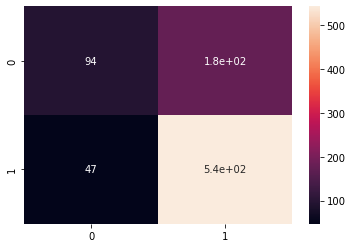

In [54]:
cm=confusion_matrix(pred_df_6['Actual Class'],pred_df_6['Predicted Class'])
report=classification_report(pred_df_6['Actual Class'],pred_df_6['Predicted Class'])
score=roc_auc_score(pred_df_6['Actual Class'],pred_df_6['Predicted Class'])

sns.heatmap(cm,annot=True)
print(' The Report:\n', report)
print(' The ROC-AUC-Score:',score)

## Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train_6,y_train_6)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [58]:
logreg_cv.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [59]:
logreg_cv.best_score_

0.668413112753407

In [60]:
logR_7=LogisticRegression()
logR_7.fit(x_train_6,y_train_6)

LogisticRegression()

In [61]:
score = logR_7.score(x_test_6, y_test_6)
print(score)

0.6926658905704307


## Important features

In [62]:
x_6

,Sector_Healthcare,Dividend Yield,priceEarningsRatio,Dividend per Share,Sector_Energy,Capital Expenditure,longtermDebtToCapitalization,interestCoverage,Sector_Financial Services,Operating Income,Sector_Real Estate,Sector_Utilities
0,0,0.0269,13.3008,0.917,0,-1.231200e+10,0.599833,5.2662,0,1.900900e+10,0,0
1,0,0.0471,23.3030,0.725,1,-2.924000e+09,0.501908,2.1455,0,3.794000e+09,0,0
2,0,0.0256,10.2691,1.200,0,-1.518100e+10,0.251834,-184.0556,0,2.331600e+10,0,0
3,0,0.0000,4.2999,0.000,0,-8.879000e+09,0.104785,42.8216,0,1.499400e+10,0,0
4,0,0.0508,0.0000,0.370,0,-3.537000e+09,0.758131,-3.3036,0,-1.455700e+10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4286,1,0.0000,2.8833,0.000,0,0.000000e+00,0.002398,0.0000,0,-7.930000e+05,0,0
4287,0,0.0000,0.0000,0.000,0,9.064000e+03,0.368359,-0.3406,0,-3.755251e+06,1,0
4288,0,0.0000,0.0000,0.000,0,-4.200000e+04,0.496599,0.0000,0,-9.274000e+06,0,0
4289,0,0.0000,6.1538,0.000,0,-4.671380e+05,0.000000,7.7919,0,9.617636e+06,0,0


In [63]:
insignificant_col={'interestCoverage','Operating Income','Capital Expenditure'}

In [64]:
signi_col=list(set(x_6.columns)-insignificant_col)

In [65]:
x_7=x_6[signi_col]

In [66]:
x_7

,Sector_Financial Services,longtermDebtToCapitalization,Sector_Energy,Sector_Healthcare,Dividend per Share,Sector_Real Estate,priceEarningsRatio,Sector_Utilities,Dividend Yield
0,0,0.599833,0,0,0.917,0,13.3008,0,0.0269
1,0,0.501908,1,0,0.725,0,23.3030,0,0.0471
2,0,0.251834,0,0,1.200,0,10.2691,0,0.0256
3,0,0.104785,0,0,0.000,0,4.2999,0,0.0000
4,0,0.758131,0,0,0.370,0,0.0000,0,0.0508
...,...,...,...,...,...,...,...,...,...
4286,0,0.002398,0,1,0.000,0,2.8833,0,0.0000
4287,0,0.368359,0,0,0.000,1,0.0000,0,0.0000
4288,0,0.496599,0,0,0.000,0,0.0000,0,0.0000
4289,0,0.000000,0,0,0.000,0,6.1538,0,0.0000


In [67]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4286    0
4287    0
4288    0
4289    0
4290    0
Name: Class, Length: 4291, dtype: int64

In [68]:
type(y)

pandas.core.series.Series

In [69]:
type(x)

pandas.core.frame.DataFrame

In [70]:
x_7['Class']=y

In [71]:
stock_new=x_7

In [72]:
stock_new

,Sector_Financial Services,longtermDebtToCapitalization,Sector_Energy,Sector_Healthcare,Dividend per Share,Sector_Real Estate,priceEarningsRatio,Sector_Utilities,Dividend Yield,Class
0,0,0.599833,0,0,0.917,0,13.3008,0,0.0269,1
1,0,0.501908,1,0,0.725,0,23.3030,0,0.0471,1
2,0,0.251834,0,0,1.200,0,10.2691,0,0.0256,1
3,0,0.104785,0,0,0.000,0,4.2999,0,0.0000,1
4,0,0.758131,0,0,0.370,0,0.0000,0,0.0508,1
...,...,...,...,...,...,...,...,...,...,...
4286,0,0.002398,0,1,0.000,0,2.8833,0,0.0000,0
4287,0,0.368359,0,0,0.000,1,0.0000,0,0.0000,0
4288,0,0.496599,0,0,0.000,0,0.0000,0,0.0000,0
4289,0,0.000000,0,0,0.000,0,6.1538,0,0.0000,0


## Dealing with imbalanced dataset

In [73]:
stock_new['Class'].value_counts()

1    2945
0    1346
Name: Class, dtype: int64

In [74]:
1346/(1346+2945)

0.3136797949195992

Dataset is quite unbalanced as dataset contains 69% of 1 class and 39% of 0 class

## Resolving the Imbalance

In [75]:
stock_yes=stock_new[stock_new['Class']==1]

In [76]:
stock_yes.shape

(2945, 10)

In [77]:
stock_no=stock_new[stock_new['Class']==0]
stock_no.shape

(1346, 10)

### Upsampling

In [78]:
from sklearn.utils import resample

stock_no_up=resample(stock_no, replace=True,random_state=100,n_samples=2000)
stock_no_up.shape

(2000, 10)

### Downsampling

In [79]:
from sklearn.utils import resample

stock_yes_down=resample(stock_yes, replace=False,random_state=100,n_samples=2500)
stock_yes_down.shape

(2500, 10)

### Creating the dataset by combining

In [80]:
stock_new=pd.concat([stock_no_up,stock_yes_down])
stock_new.shape

(4500, 10)

In [81]:
stock_new

,Sector_Financial Services,longtermDebtToCapitalization,Sector_Energy,Sector_Healthcare,Dividend per Share,Sector_Real Estate,priceEarningsRatio,Sector_Utilities,Dividend Yield,Class
2887,0,0.140011,0,1,0.000,0,0.0000,0,0.0000,0
403,0,0.284316,0,0,0.920,0,14.1481,0,0.0301,0
1552,0,0.899275,0,1,0.000,0,0.0000,0,0.0000,0
242,0,0.742698,0,0,0.000,0,0.0000,0,0.0000,0
2915,0,0.000000,0,1,0.000,0,0.0000,0,0.0000,0
...,...,...,...,...,...,...,...,...,...,...
690,0,1.130008,0,0,0.000,0,2.8554,0,0.0000,1
1941,1,0.000247,0,0,1.490,0,13.5141,0,0.0239,1
530,0,0.467364,0,0,0.172,0,11.6582,0,0.0187,1
3688,1,0.165749,0,0,0.000,0,21.4548,0,0.0000,1


### Shuffling

In [82]:
from sklearn.utils import shuffle
stock_new=shuffle(stock_new)
stock_new

,Sector_Financial Services,longtermDebtToCapitalization,Sector_Energy,Sector_Healthcare,Dividend per Share,Sector_Real Estate,priceEarningsRatio,Sector_Utilities,Dividend Yield,Class
278,0,0.330251,0,0,1.352,0,33.3597,0,0.0292,0
2103,0,0.133028,0,0,0.000,0,0.0000,0,0.0000,0
2957,0,0.437369,0,0,0.000,0,20.8219,0,0.0000,0
764,1,0.305219,0,0,1.780,0,9.7330,0,0.0282,1
3694,1,0.305528,0,0,0.000,0,0.0000,0,0.0000,0
...,...,...,...,...,...,...,...,...,...,...
1893,0,0.513564,0,0,1.140,1,22.7037,0,0.0930,1
2035,0,0.000000,0,0,0.628,0,28.2835,0,0.0175,1
179,0,0.000000,1,0,0.470,0,12.0366,0,0.0476,0
1926,1,0.274827,0,0,0.000,0,8.0982,0,0.0000,1


In [83]:
y = stock_new['Class'] #target variable
x = stock_new.drop(['Class'], axis=1)

## Standardisation of features

In [84]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_scaled=scaler.fit_transform(x)
x_scaled

array([[-4.57905470e-01, -3.02513314e-02, -2.71059555e-01, ...,
         1.62514238e-01, -1.44468486e-01,  1.78749892e-02],
       [-4.57905470e-01, -3.11322964e-01, -2.71059555e-01, ...,
        -2.76493450e-01, -1.44468486e-01, -1.36615031e-01],
       [-4.57905470e-01,  1.22408252e-01, -2.71059555e-01, ...,
        -2.48096816e-03, -1.44468486e-01, -1.36615031e-01],
       ...,
       [-4.57905470e-01, -5.00908130e-01,  3.68922615e+00, ...,
        -1.18093946e-01, -1.44468486e-01,  1.15224865e-01],
       [ 2.18385686e+00, -1.09238838e-01, -2.71059555e-01, ...,
        -1.69922585e-01, -1.44468486e-01, -1.36615031e-01],
       [-4.57905470e-01,  1.19855599e+00, -2.71059555e-01, ...,
        -2.76493450e-01, -1.44468486e-01, -1.36615031e-01]])

In [85]:
x_train_6,x_test_6,y_train_6,y_test_6=train_test_split(
     x_scaled,y,test_size=0.2,random_state=10)

x_train_6.shape,x_test_6.shape,y_train_6.shape,y_test_6.shape

((3600, 9), (900, 9), (3600,), (900,))

## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

dt_1=DecisionTreeClassifier()

## Training the model

dt_1=dt_1.fit(x_train_6,y_train_6)

In [87]:
dt_1

DecisionTreeClassifier()

In [88]:
y_pred_1=dt_1.predict(x_test_6)
y_pred_1

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,

 The Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77       401
           1       0.86      0.71      0.77       499

    accuracy                           0.77       900
   macro avg       0.78      0.78      0.77       900
weighted avg       0.79      0.77      0.77       900

 The ROC-AUC-Score: 0.7803862088266309


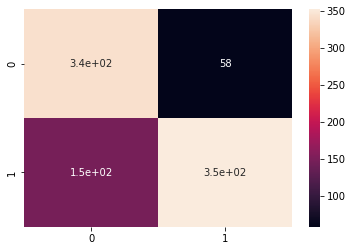

In [89]:
cm=confusion_matrix(y_test_6,y_pred_1)
report=classification_report(y_test_6,y_pred_1)
score=roc_auc_score(y_test_6,y_pred_1)

sns.heatmap(cm,annot=True)
print(' The Report:\n', report)
print(' The ROC-AUC-Score:',score)

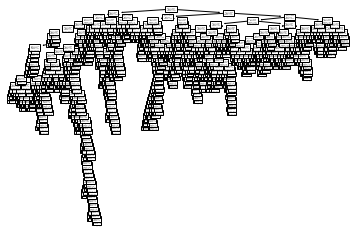

In [90]:
from sklearn.tree import plot_tree
plot_tree(dt_1);

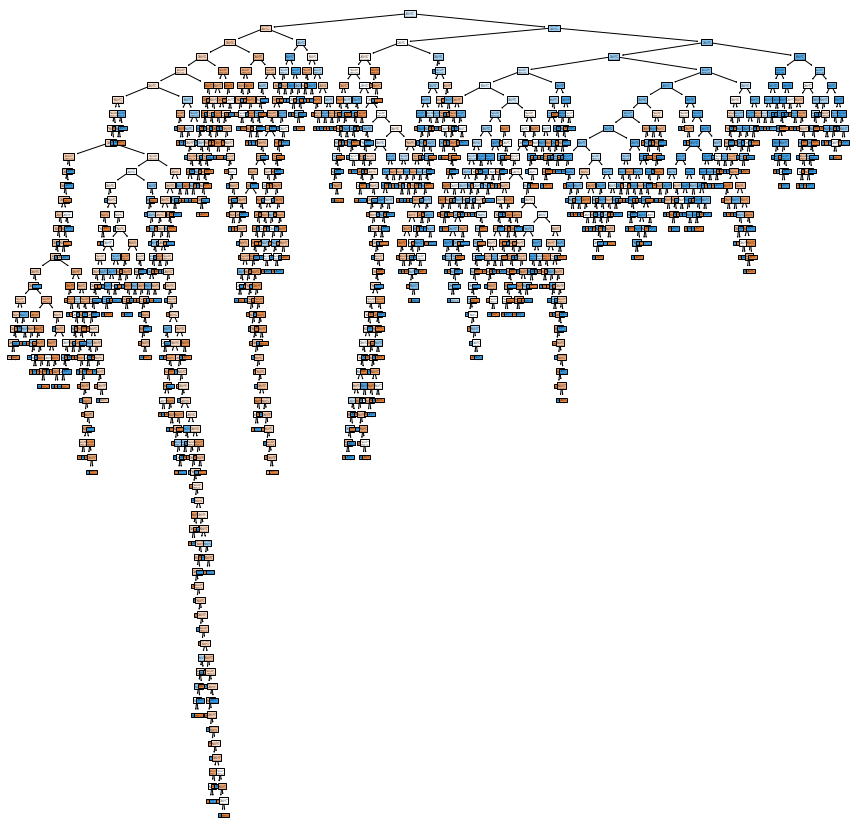

In [91]:
plt.figure(figsize=(15,15))
plot_tree(dt_1,filled=True);

## Decision Rules

In [92]:
from sklearn.tree import export_text

text=export_text(dt_1,feature_names=list(x.columns))
print(text)

|--- priceEarningsRatio <= -0.19
|   |--- Dividend per Share <= 0.09
|   |   |--- Sector_Healthcare <= 0.94
|   |   |   |--- Sector_Energy <= 1.71
|   |   |   |   |--- Dividend Yield <= 0.30
|   |   |   |   |   |--- Dividend per Share <= -0.27
|   |   |   |   |   |   |--- longtermDebtToCapitalization <= 2.36
|   |   |   |   |   |   |   |--- priceEarningsRatio <= -0.19
|   |   |   |   |   |   |   |   |--- priceEarningsRatio <= -0.20
|   |   |   |   |   |   |   |   |   |--- longtermDebtToCapitalization <= -0.18
|   |   |   |   |   |   |   |   |   |   |--- Sector_Real Estate <= 1.97
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 22
|   |   |   |   |   |   |   |   |   |   |--- Sector_Real Estate >  1.97
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- longtermDebtToCapitalization >  -0.18
|   |   |   |   |   |   |   |   |   |   |--- longtermDebtToCapitalization <= 0.15
|   |   |   |   |   |   |   |   |   |   |   

In [93]:
dt_1.criterion

'gini'

In [94]:
dt_1.tree_.max_depth

56

## Modifying DT model

In [95]:
dt_2=DecisionTreeClassifier(criterion='entropy',max_depth=10)

dt_2=dt_2.fit(x_train_6,y_train_6)
y_pred_2=dt_2.predict(x_test_6)

 The Report:
               precision    recall  f1-score   support

           0       0.62      0.79      0.70       401
           1       0.78      0.61      0.68       499

    accuracy                           0.69       900
   macro avg       0.70      0.70      0.69       900
weighted avg       0.71      0.69      0.69       900

 The ROC-AUC-Score: 0.7001159426084089


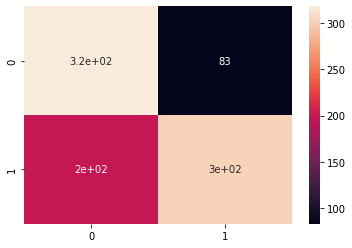

In [96]:
cm=confusion_matrix(y_test_6,y_pred_2)
report=classification_report(y_test_6,y_pred_2)
score=roc_auc_score(y_test_6,y_pred_2)

sns.heatmap(cm,annot=True)
print(' The Report:\n', report)
print(' The ROC-AUC-Score:',score)

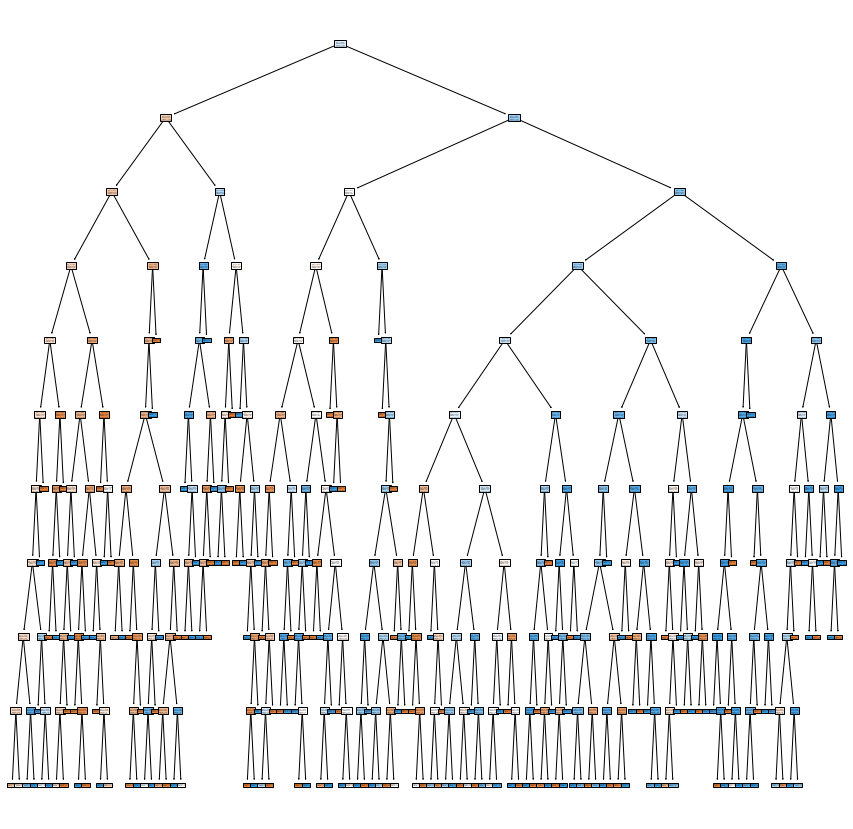

In [97]:
plt.figure(figsize=(15,15))
plot_tree(dt_2,filled=True);

## Support Vector Classifier

In [98]:
from sklearn.svm import SVC

svc_lin=SVC(kernel='linear',probability=True)
svc_lin=svc_lin.fit(x_train_6, y_train_6)
y_pred=svc_lin.predict(x_test_6)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [99]:
y_pred_prob=svc_lin.predict_proba(x_test_6)
y_pred_prob

array([[0.37889262, 0.62110738],
       [0.65289876, 0.34710124],
       [0.65266137, 0.34733863],
       ...,
       [0.65330838, 0.34669162],
       [0.38124456, 0.61875544],
       [0.37445099, 0.62554901]])

### Performance Checking

 The Report:
               precision    recall  f1-score   support

           0       0.64      0.33      0.43       401
           1       0.61      0.85      0.71       499

    accuracy                           0.62       900
   macro avg       0.62      0.59      0.57       900
weighted avg       0.62      0.62      0.59       900

 The ROC-AUC-Score: 0.5894382280771018


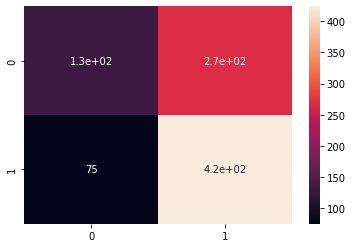

In [100]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

cm=confusion_matrix(y_test_6,y_pred)
report=classification_report(y_test_6,y_pred)
score=roc_auc_score(y_test_6,y_pred)
fpr,tpr,_=roc_curve(y_test_6,y_pred_prob[:,1])

sns.heatmap(cm,annot=True)
print(' The Report:\n', report)
print(' The ROC-AUC-Score:',score)

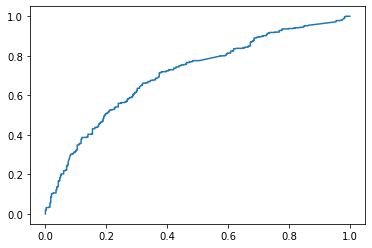

In [101]:
plt.plot(fpr,tpr);

## Hyper Parameter Tuning

### Kernel

In [102]:
def SVC_tuning_kernel(kernel):
    model=SVC(kernel=kernel)
    model=model.fit(x_train_6,y_train_6)
    y_pred=model.predict(x_test_6)
    cm=confusion_matrix(y_test_6,y_pred)
    report=classification_report(y_test_6,y_pred)
    score=roc_auc_score(y_test_6,y_pred)
    print(' The SVC with kernel:',kernel)
    print()
    print('  ************* ')
    print(' Confusion Matrix:\n',cm)
    print(' The report:\n', report)
    print(' The ROC-AUC-Score:', score)
    sns.heatmap(cm,annot=True);

 The SVC with kernel: linear

  ************* 
 Confusion Matrix:
 [[132 269]
 [ 75 424]]
 The report:
               precision    recall  f1-score   support

           0       0.64      0.33      0.43       401
           1       0.61      0.85      0.71       499

    accuracy                           0.62       900
   macro avg       0.62      0.59      0.57       900
weighted avg       0.62      0.62      0.59       900

 The ROC-AUC-Score: 0.5894382280771018


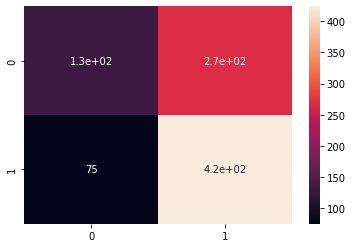

In [103]:
# Calling the fn

SVC_tuning_kernel('linear')

 The SVC with kernel: poly

  ************* 
 Confusion Matrix:
 [[130 271]
 [ 63 436]]
 The report:
               precision    recall  f1-score   support

           0       0.67      0.32      0.44       401
           1       0.62      0.87      0.72       499

    accuracy                           0.63       900
   macro avg       0.65      0.60      0.58       900
weighted avg       0.64      0.63      0.60       900

 The ROC-AUC-Score: 0.5989685105872593


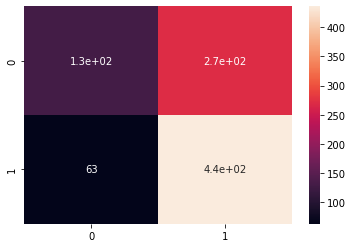

In [104]:
SVC_tuning_kernel('poly')

 The SVC with kernel: rbf

  ************* 
 Confusion Matrix:
 [[253 148]
 [149 350]]
 The report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63       401
           1       0.70      0.70      0.70       499

    accuracy                           0.67       900
   macro avg       0.67      0.67      0.67       900
weighted avg       0.67      0.67      0.67       900

 The ROC-AUC-Score: 0.6661627494390276


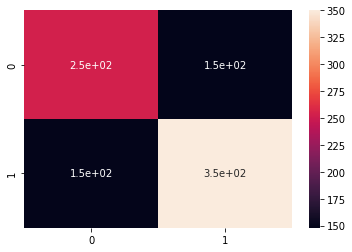

In [105]:
SVC_tuning_kernel('rbf')

 The SVC with kernel: sigmoid

  ************* 
 Confusion Matrix:
 [[212 189]
 [170 329]]
 The report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54       401
           1       0.64      0.66      0.65       499

    accuracy                           0.60       900
   macro avg       0.60      0.59      0.59       900
weighted avg       0.60      0.60      0.60       900

 The ROC-AUC-Score: 0.5939984707569752


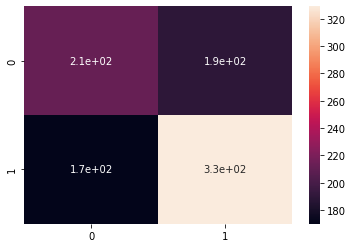

In [106]:
SVC_tuning_kernel('sigmoid')

The best kernel after tuning is 'rbf' or Radial Basis Function Kernel

## RBF kernel

### Tuning Regularisation Parameter

In [107]:
def SVC_tuning_C(C_list):
    for c in C_list:
        model=SVC(kernel='rbf',C=c)
        model=model.fit(x_train_6,y_train_6)
        y_pred=model.predict(x_test_6)
        score=roc_auc_score(y_test_6,y_pred)
        print('C:',c,'===>','Score:',score)

In [108]:
C_list=[0.1,1,2,3,4,5,10,15,20,25,30]

In [109]:
SVC_tuning_C(C_list)

C: 0.1 ===> Score: 0.5914872138291545
C: 1 ===> Score: 0.6661627494390276
C: 2 ===> Score: 0.6699258866860904
C: 3 ===> Score: 0.6749134178581603
C: 4 ===> Score: 0.6761603006511776
C: 5 ===> Score: 0.6804356843362537
C: 10 ===> Score: 0.6831743287072899
C: 15 ===> Score: 0.6841988215833161
C: 20 ===> Score: 0.6882068376153804
C: 25 ===> Score: 0.6899659668464109
C: 30 ===> Score: 0.688963962838395


In [110]:
C_list=[21,22,23,24,25,26,27,28,29]

In [111]:
SVC_tuning_C(C_list)

C: 21 ===> Score: 0.6902108456314124
C: 22 ===> Score: 0.688963962838395
C: 23 ===> Score: 0.6902108456314124
C: 24 ===> Score: 0.6912128496394285
C: 25 ===> Score: 0.6899659668464109
C: 26 ===> Score: 0.690967970854427
C: 27 ===> Score: 0.6897210880614095
C: 28 ===> Score: 0.6877170800453776
C: 29 ===> Score: 0.6867150760373615


After tuning the best value for C is 24

So, the best model is the one with kernel='rbf' and C=0.7

### The Final SVC Model

The Confusion Matrix:
ROC-AUC-Score: 0.6912128496394285
 The report:               precision    recall  f1-score   support

           0       0.67      0.63      0.65       401
           1       0.72      0.75      0.73       499

    accuracy                           0.70       900
   macro avg       0.69      0.69      0.69       900
weighted avg       0.70      0.70      0.70       900



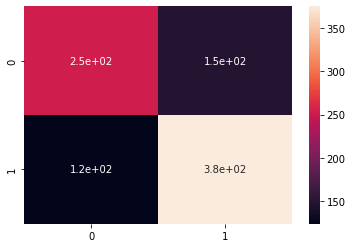

In [112]:
svc=SVC(kernel='rbf',C=24,probability=True)
svc=svc.fit(x_train_6,y_train_6)
y_pred=svc.predict(x_test_6)
y_pred_prob=svc.predict_proba(x_test_6)

cm=confusion_matrix(y_test_6,y_pred)
score=roc_auc_score(y_test_6,y_pred)
report=classification_report(y_test_6,y_pred)
fpr,tpr,_=roc_curve(y_test_6,y_pred_prob[:,1])

print('The Confusion Matrix:')
sns.heatmap(cm,annot=True)
print('ROC-AUC-Score:',score)
print(' The report:',report)

# KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train_6, y_train_6)

KNeighborsClassifier()

### Model performance

In [114]:
cm=confusion_matrix(y_test_6,knn.predict(x_test_6))
report=classification_report(y_test_6,knn.predict(x_test_6))
score=roc_auc_score(y_test_6,knn.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[267 134]
 [136 363]]
Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.66       401
           1       0.73      0.73      0.73       499

    accuracy                           0.70       900
   macro avg       0.70      0.70      0.70       900
weighted avg       0.70      0.70      0.70       900

ROC-AUC Curve 0.6966451606454804


### Hyper parameter tuning using GridSearchCV

In [115]:
from sklearn.model_selection import GridSearchCV

knn_gs=GridSearchCV(knn,{'n_neighbors':range(3,25)})

knn_gs.fit(x_train_6,y_train_6)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 25)})

In [116]:
knn_gs.best_params_

{'n_neighbors': 3}

### Best KNN Model

In [117]:
knn_best=KNeighborsClassifier(n_neighbors=3)
knn_best.fit(x_train_6,y_train_6)

KNeighborsClassifier(n_neighbors=3)

In [118]:
cm=confusion_matrix(y_test_6,knn_best.predict(x_test_6))
report=classification_report(y_test_6,knn_best.predict(x_test_6))
score=roc_auc_score(y_test_6,knn_best.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[286 115]
 [136 363]]
Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70       401
           1       0.76      0.73      0.74       499

    accuracy                           0.72       900
   macro avg       0.72      0.72      0.72       900
weighted avg       0.72      0.72      0.72       900

ROC-AUC Curve 0.7203359337128121


# Ensemblem Learning

In [119]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(x_train_6,y_train_6)

RandomForestClassifier(random_state=100)

In [120]:
cm=confusion_matrix(y_test_6,rfc.predict(x_test_6))
report=classification_report(y_test_6,rfc.predict(x_test_6))
score=roc_auc_score(y_test_6,rfc.predict(x_test_6))

print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[341  60]
 [109 390]]
Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       401
           1       0.87      0.78      0.82       499

    accuracy                           0.81       900
   macro avg       0.81      0.82      0.81       900
weighted avg       0.82      0.81      0.81       900

ROC-AUC Curve 0.8159685955452052


## Extensive Hyperparameter tuning

In [125]:
from sklearn.model_selection import GridSearchCV

rfc_gs=GridSearchCV(rfc,{'n_estimators':range(75,125),
                        'criterion':['gini','entropy','log_loss']})

In [126]:
rfc_gs.fit(x_train_6,y_train_6)

GridSearchCV(estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': range(75, 125)})

In [127]:
rfc_gs.best_params_

{'criterion': 'gini', 'n_estimators': 83}

In [128]:
rfc_new=RandomForestClassifier(n_estimators=83, 
                               criterion='gini',random_state=10)

In [129]:
rfc_new.fit(x_train_6,y_train_6)

RandomForestClassifier(n_estimators=83, random_state=10)

In [130]:
# Perfromance

cm=confusion_matrix(y_test_6,rfc_new.predict(x_test_6))
report=classification_report(y_test_6,rfc_new.predict(x_test_6))
score=roc_auc_score(y_test_6,rfc_new.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[340  61]
 [106 393]]
Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       401
           1       0.87      0.79      0.82       499

    accuracy                           0.81       900
   macro avg       0.81      0.82      0.81       900
weighted avg       0.82      0.81      0.81       900

ROC-AUC Curve 0.8177277247762358


In [131]:
rfc_new.feature_importances_

array([0.02613187, 0.3785973 , 0.01877922, 0.01343753, 0.12984544,
       0.0129432 , 0.28852913, 0.00535603, 0.12638027])

In [132]:
# Creating a DF

df=pd.DataFrame({'Feature':x.columns,'Feature Imp':rfc_new.feature_importances_})
df

,Feature,Feature Imp
0,Sector_Financial Services,0.026132
1,longtermDebtToCapitalization,0.378597
2,Sector_Energy,0.018779
3,Sector_Healthcare,0.013438
4,Dividend per Share,0.129845
5,Sector_Real Estate,0.012943
6,priceEarningsRatio,0.288529
7,Sector_Utilities,0.005356
8,Dividend Yield,0.126380


In [133]:
df=df.sort_values(['Feature Imp'],ascending=False)
df

,Feature,Feature Imp
1,longtermDebtToCapitalization,0.378597
6,priceEarningsRatio,0.288529
4,Dividend per Share,0.129845
8,Dividend Yield,0.126380
0,Sector_Financial Services,0.026132
2,Sector_Energy,0.018779
3,Sector_Healthcare,0.013438
5,Sector_Real Estate,0.012943
7,Sector_Utilities,0.005356


In [134]:
# Adding one column

df['Feature Imp Cum']=df['Feature Imp'].cumsum()
df

,Feature,Feature Imp,Feature Imp Cum
1,longtermDebtToCapitalization,0.378597,0.378597
6,priceEarningsRatio,0.288529,0.667126
4,Dividend per Share,0.129845,0.796972
8,Dividend Yield,0.126380,0.923352
0,Sector_Financial Services,0.026132,0.949484
2,Sector_Energy,0.018779,0.968263
3,Sector_Healthcare,0.013438,0.981701
5,Sector_Real Estate,0.012943,0.994644
7,Sector_Utilities,0.005356,1.000000


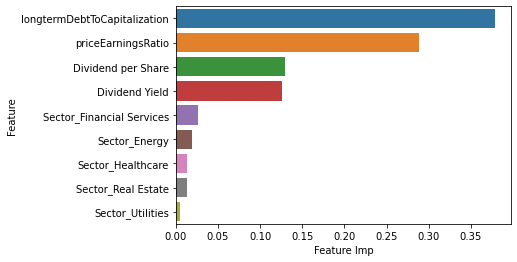

In [135]:
sns.barplot(x=df['Feature Imp'],y=df['Feature'],data=df);

## Boosting

 ### Adaboost

In [136]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=10)
abc.fit(x_train_6,y_train_6)

AdaBoostClassifier(random_state=10)

In [137]:
cm=confusion_matrix(y_test_6,abc.predict(x_test_6))
report=classification_report(y_test_6,abc.predict(x_test_6))
score=roc_auc_score(y_test_6,abc.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[273 128]
 [136 363]]
Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67       401
           1       0.74      0.73      0.73       499

    accuracy                           0.71       900
   macro avg       0.70      0.70      0.70       900
weighted avg       0.71      0.71      0.71       900

ROC-AUC Curve 0.7041264574035853


In [138]:
abc_gs=GridSearchCV(abc,{'n_estimators':range(25,75),
                        'learning_rate':[0,0.25,0.5,0.75,1]})

In [139]:
abc_gs.fit(x_train_6, y_train_6)

GridSearchCV(estimator=AdaBoostClassifier(random_state=10),
             param_grid={'learning_rate': [0, 0.25, 0.5, 0.75, 1],
                         'n_estimators': range(25, 75)})

In [140]:
abc_gs.best_params_

{'learning_rate': 0.5, 'n_estimators': 44}

In [141]:
## Building the best model

abc_best=AdaBoostClassifier(learning_rate=0.5,n_estimators=44,random_state=10)
abc_best.fit(x_train_6,y_train_6)

AdaBoostClassifier(learning_rate=0.5, n_estimators=44, random_state=10)

In [142]:
cm=confusion_matrix(y_test_6,abc_best.predict(x_test_6))
report=classification_report(y_test_6,abc_best.predict(x_test_6))
score=roc_auc_score(y_test_6,abc_best.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[255 146]
 [129 370]]
Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       401
           1       0.72      0.74      0.73       499

    accuracy                           0.69       900
   macro avg       0.69      0.69      0.69       900
weighted avg       0.69      0.69      0.69       900

ROC-AUC Curve 0.6886965951853833


## Building - Gradient Boosting Classifier

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
gbc=GradientBoostingClassifier(random_state=10)
gbc.fit(x_train_6,y_train_6)

GradientBoostingClassifier(random_state=10)

In [146]:
cm=confusion_matrix(y_test_6,gbc.predict(x_test_6))
report=classification_report(y_test_6,gbc.predict(x_test_6))
score=roc_auc_score(y_test_6,gbc.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[282 119]
 [126 373]]
Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70       401
           1       0.76      0.75      0.75       499

    accuracy                           0.73       900
   macro avg       0.72      0.73      0.72       900
weighted avg       0.73      0.73      0.73       900

ROC-AUC Curve 0.7253684426209026


In [147]:
# Hyper parameter tuning

gbc_gs=GridSearchCV(gbc,{'n_estimators':range(75,125),
                        'max_depth':range(1,5)})

In [148]:
gbc_gs.fit(x_train_6,y_train_6)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'max_depth': range(1, 5),
                         'n_estimators': range(75, 125)})

In [149]:
gbc_gs.best_params_

{'max_depth': 4, 'n_estimators': 124}

### Best Gradient Boosting model

In [150]:
grad_best=GradientBoostingClassifier(max_depth=4,n_estimators=124,random_state=10)
grad_best.fit(x_train_6,y_train_6)

GradientBoostingClassifier(max_depth=4, n_estimators=124, random_state=10)

In [151]:
cm=confusion_matrix(y_test_6,grad_best.predict(x_test_6))
report=classification_report(y_test_6,grad_best.predict(x_test_6))
score=roc_auc_score(y_test_6,grad_best.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[299 102]
 [129 370]]
Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       401
           1       0.78      0.74      0.76       499

    accuracy                           0.74       900
   macro avg       0.74      0.74      0.74       900
weighted avg       0.75      0.74      0.74       900

ROC-AUC Curve 0.7435594380781514


## XGBoost

In [152]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [153]:
from xgboost import XGBClassifier

In [154]:
xg=XGBClassifier()
xg.fit(x_train_6,y_train_6)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [155]:
cm=confusion_matrix(y_test_6,xg.predict(x_test_6))
report=classification_report(y_test_6,xg.predict(x_test_6))
score=roc_auc_score(y_test_6,xg.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[338  63]
 [125 374]]
Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       401
           1       0.86      0.75      0.80       499

    accuracy                           0.79       900
   macro avg       0.79      0.80      0.79       900
weighted avg       0.80      0.79      0.79       900

ROC-AUC Curve 0.7961958830378963


In [156]:
# hyper parameter tuning

xg_gs=GridSearchCV(xg,{'n_estimators':range(75,125),
                        'max_depth':range(1,5)})

In [157]:
xg_gs.fit(x_train_6,y_train_6)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='(

In [158]:
xg_gs.best_params_

{'max_depth': 4, 'n_estimators': 108}

### Best XGBoost model

In [159]:
xg_best=XGBClassifier(max_depth=4, n_estimators=108)

In [160]:
xg_best.fit(x_train_6,y_train_6)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=108,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [161]:
cm=confusion_matrix(y_test_6,xg_best.predict(x_test_6))
report=classification_report(y_test_6,xg_best.predict(x_test_6))
score=roc_auc_score(y_test_6,xg_best.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[320  81]
 [133 366]]
Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75       401
           1       0.82      0.73      0.77       499

    accuracy                           0.76       900
   macro avg       0.76      0.77      0.76       900
weighted avg       0.77      0.76      0.76       900

ROC-AUC Curve 0.7657359606994538


The best model is so far is Gradient Boosting model

## Selecting the best boosting model

In [162]:
grad_best.feature_importances_

array([0.03660725, 0.23975134, 0.03556432, 0.01327379, 0.15708126,
       0.01558824, 0.37693071, 0.00186859, 0.12333449])

In [163]:
df=pd.DataFrame({'Feature':x.columns, 'Imp':grad_best.feature_importances_})
df

,Feature,Imp
0,Sector_Financial Services,0.036607
1,longtermDebtToCapitalization,0.239751
2,Sector_Energy,0.035564
3,Sector_Healthcare,0.013274
4,Dividend per Share,0.157081
5,Sector_Real Estate,0.015588
6,priceEarningsRatio,0.376931
7,Sector_Utilities,0.001869
8,Dividend Yield,0.123334


In [164]:
df1=df.sort_values(['Imp'],ascending=False)
df1

,Feature,Imp
6,priceEarningsRatio,0.376931
1,longtermDebtToCapitalization,0.239751
4,Dividend per Share,0.157081
8,Dividend Yield,0.123334
0,Sector_Financial Services,0.036607
2,Sector_Energy,0.035564
5,Sector_Real Estate,0.015588
3,Sector_Healthcare,0.013274
7,Sector_Utilities,0.001869


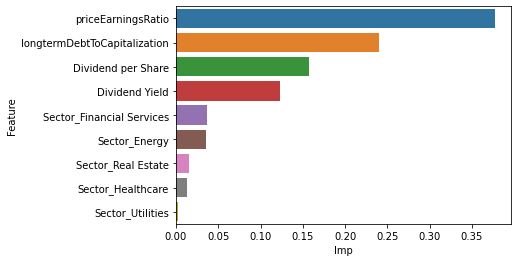

In [165]:
sns.barplot(x=df1['Imp'],y=df1['Feature'],data=df1);

# K Means Clustering

### Finding K using elbow

In [166]:
from sklearn.cluster import KMeans

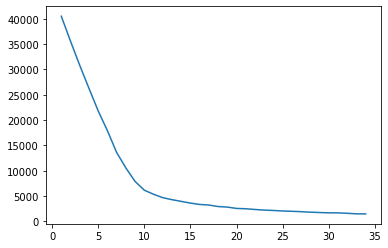

In [167]:
SSD=[]
for k in range(1,35):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(x_scaled)
    SSD.append(kmeans.inertia_)
plt.plot(range(1,35),SSD);

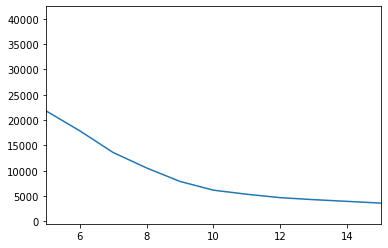

In [168]:
SSD=[]
for k in range(1,35):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(x_scaled)
    SSD.append(kmeans.inertia_)
plt.plot(range(1,35),SSD);
plt.xlim([5,15]);

K value is 10 or 11 according to Elbow method

## Silhouette Method

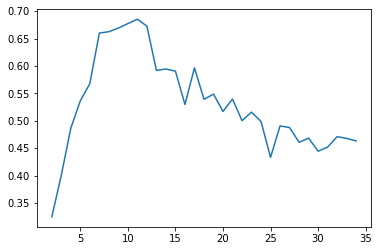

In [169]:
from sklearn.metrics import silhouette_score
SS=[]
for k in range(2,35):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(x_scaled)
    SS.append(silhouette_score(x_scaled,kmeans.predict(x_scaled)))
plt.plot(range(2,35),SS);

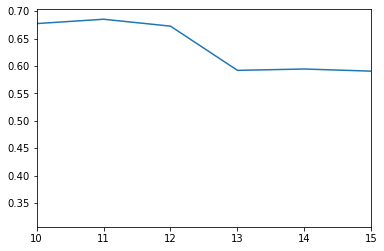

In [170]:
from sklearn.metrics import silhouette_score
SS=[]
for k in range(2,35):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(x_scaled)
    SS.append(silhouette_score(x_scaled,kmeans.predict(x_scaled)))
plt.plot(range(2,35),SS);
plt.xlim([10,15]);

Best K value is=11 from Silhouette score

## Building the best Model

In [171]:
k_final=KMeans(n_clusters=11,random_state=10)
k_final.fit(x_scaled)
clusters=k_final.predict(x_scaled)
clusters

array([0, 0, 0, ..., 1, 2, 0])

In [172]:
# The cluster centroids

k_final.cluster_centers_

array([[-4.57905470e-01, -3.60237043e-03, -2.71059555e-01,
        -4.32098207e-01, -8.82448305e-02, -2.38919343e-01,
        -4.21500368e-02, -1.44468486e-01, -5.45873061e-02],
       [-4.57905470e-01,  1.05423608e-01,  3.68922615e+00,
        -4.32098207e-01,  3.11171255e-02, -2.38919343e-01,
        -1.30496523e-01, -1.44468486e-01,  5.26477746e-02],
       [ 2.18385686e+00, -3.28928206e-02, -2.71059555e-01,
        -4.32098207e-01,  5.86645602e-02, -2.38919343e-01,
        -7.88693948e-02, -1.44468486e-01, -4.07548841e-03],
       [-4.57905470e-01,  1.64048699e-01, -2.71059555e-01,
        -4.32098207e-01,  5.25607309e-01,  4.18551293e+00,
         7.10900062e-02, -1.44468486e-01,  1.73074103e-01],
       [-4.57905470e-01, -1.66343742e-01, -2.71059555e-01,
         2.31428870e+00, -3.11524693e-01, -2.38919343e-01,
        -1.14906384e-01, -1.44468486e-01, -1.22669416e-01],
       [-4.57905470e-01, -2.27539340e-01, -2.71059555e-01,
        -4.32098207e-01,  5.86649471e+00, -2.389193

In [173]:
cm=confusion_matrix(y_test_6,k_final.predict(x_test_6))
report=classification_report(y_test_6,k_final.predict(x_test_6))
score=roc_auc_score(y_test_6,k_final.predict(x_test_6))
print('CM:\n',cm)
print('Report:\n',report)
print('ROC-AUC Curve',score)

CM:
 [[224  43  32   9  86   1   4   0   1   1]
 [251  24 118  37  50   0  12   1   2   4]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Report:
               precision    recall  f1-score   support

           0       0.47      0.56      0.51       401
           1       0.36      0.05      0.08       499
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10  